In [1]:
import pandas as pd
from dataprep.eda import plot,plot_missing
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.features.pca import PCADecomposition
import warnings
import squarify
warnings.filterwarnings("ignore")

NumExpr defaulting to 4 threads.


C:\Users\pedro\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Import and Describe the Dataset

In [2]:
df = pd.read_csv('fifa2019.csv')

In [3]:
df.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [4]:
lista_final = {}

In [5]:
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [6]:
df.shape

(18207, 89)

In [1]:
df.columns

NameError: name 'df' is not defined

In [7]:
X = df._get_numeric_data()
plot_missing(X)

# Data Cleaning and Transformation

In [8]:
X[X.isnull().any(axis=1)].head()

,Unnamed: 0,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
5018,5018,153160,37,70,70,1574,1.0,3.0,2.0,NaN,...,77.0,64.0,79.0,70.0,70.0,16.0,8.0,11.0,12.0,13.0
6736,6736,175393,33,68,68,1664,1.0,3.0,3.0,NaN,...,69.0,67.0,12.0,34.0,33.0,16.0,13.0,15.0,16.0,8.0
7922,7922,195905,33,67,67,1619,1.0,3.0,2.0,NaN,...,42.0,54.0,72.0,71.0,64.0,11.0,7.0,8.0,12.0,12.0
9905,9905,226044,23,66,69,1632,1.0,4.0,3.0,NaN,...,67.0,64.0,19.0,24.0,23.0,13.0,11.0,11.0,7.0,9.0
10628,10628,216751,26,65,66,1536,1.0,2.0,2.0,NaN,...,39.0,57.0,68.0,69.0,68.0,14.0,12.0,11.0,14.0,12.0


In [9]:
X = X.drop(columns=['Jersey Number'])

In [10]:
X[X.isnull().any(axis=1)].head()

,Unnamed: 0,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Crossing,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
13236,13236,177971,33,62,62,1510,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13237,13237,195380,29,62,62,1532,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13238,13238,139317,35,62,62,1573,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13239,13239,240437,20,62,72,1610,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13240,13240,209462,24,62,66,1481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
X = X.dropna()

In [12]:
df = df.loc[(df['ID'].isin(X['ID'])),:]

In [13]:
X.columns

Index(['Unnamed: 0', 'ID', 'Age', 'Overall', 'Potential', 'Special',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes'],
      dtype='object')

# Group by position [GK,DEF,MID,ATTACK]

In [14]:
X = X.drop(columns=['Unnamed: 0', 'ID', 'Age', 'Overall', 'Potential', 'Special','International Reputation'])
hierarchical = AgglomerativeClustering(n_clusters=7, affinity='correlation', linkage='complete')
hierarchical.fit(X)
df['labels'] = hierarchical.labels_
df['labels'].unique()

array([2, 0, 1, 3, 5, 6, 4], dtype=int64)

In [15]:
def plot_pos(df,n):
    values = df.query(f'labels == {n}')['Position'].value_counts()
    squarify.plot(values, label=values.index,pad=True, alpha=.6 )
    print(df.query(f'labels == {n}')['Position'].shape)

## Set df to GK

(2026,)


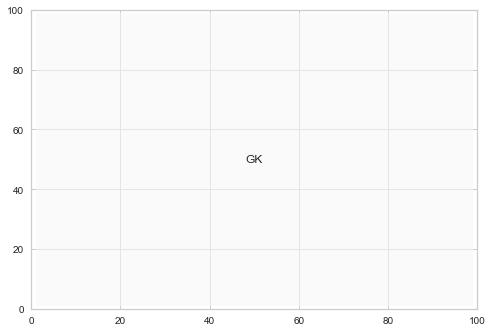

In [18]:
plot_pos(df,1)

In [19]:
df_gk = df.query('labels == 1')

## Set df to ST

(2205,)


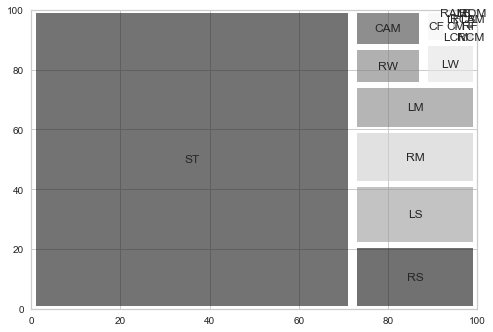

In [28]:
plot_pos(df,0)

In [29]:
df_st = df.query('labels == 0')

## Set df to RM,CAM,CM

(4796,)


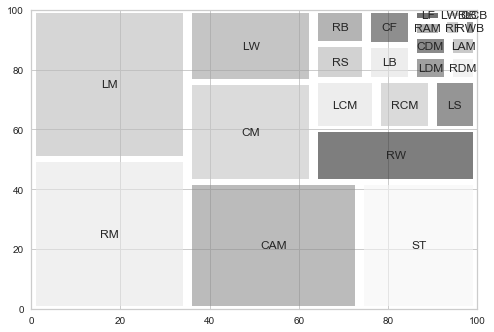

In [32]:
plot_pos(df,2)

In [33]:
df_cam = df.query('labels == 2')

## Set df to CB

(309,)


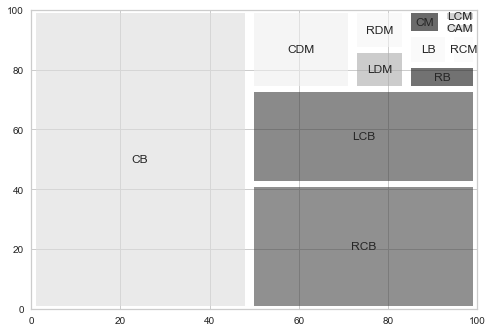

In [38]:
plot_pos(df,4)

(1819,)


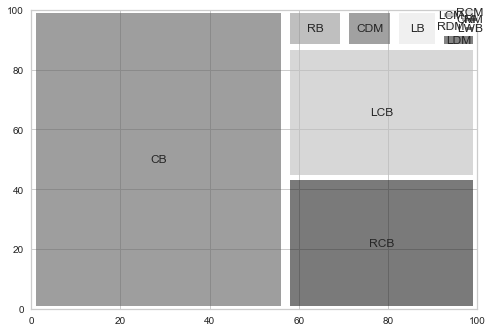

In [41]:
plot_pos(df,6)

In [42]:
df_cb = df.query('labels == 4 | labels == 6')

## Set df to RB/LB

(6523,)


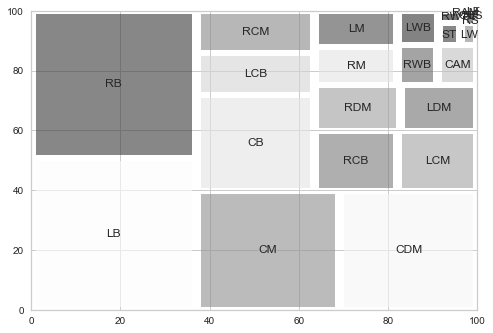

In [48]:
plot_pos(df,5)

In [49]:
df_lat = df.query('labels == 5')

## Set df to CDM/CM

(481,)


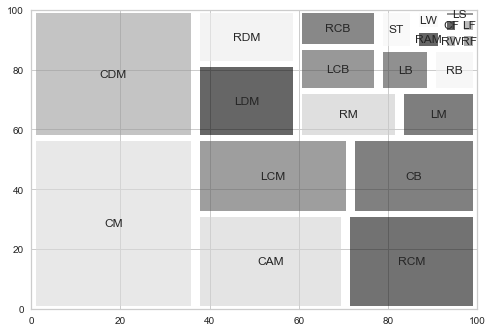

In [53]:
plot_pos(df,3)

In [54]:
df_cm = df.query('labels == 3')

# Functions

* Get numeric columns

In [55]:
def get_numeric(df):
    X = df._get_numeric_data()
    X = X.drop(columns=['Unnamed: 0', 'ID', 'Age', 'Overall', 'Potential', 'Special','International Reputation','Jersey Number'])
    return X

* Function to cleaning and transform df per position

In [56]:
def create_df_resume(df_position,x):
    mask = (~df['ID'].isin(df_position['ID']))
    df_compare = df.loc[mask,:]._get_numeric_data()
    try:
        df_compare.drop(columns=['Unnamed: 0', 'ID', 'Age', 'Overall', 'Potential', 'Special','International Reputation','Jersey Number','labels'], inplace=True)
    except:
        df_compare.drop(columns=['Unnamed: 0', 'ID', 'Age', 'Overall', 'Potential', 'Special','International Reputation','Jersey Number'], inplace=True)
    df_base = df_position._get_numeric_data()
    df_base.drop(columns=['Unnamed: 0', 'ID', 'Age', 'Overall', 'Potential', 'Special','International Reputation','Jersey Number','labels'], inplace=True)
    remove=[df_base.drop(columns=[item],inplace = True) for item in df_base.columns if df_base.mean()[item] < (df_compare.mean()[item])*x]
    return df_base

* Function to generate PCA Decompose and cluster by KMeans

In [57]:
def ger_pca_kluster(df_input,N_cluster):
    X_std = StandardScaler().fit_transform(df_input)
    pca = PCA(2)
    X_t = pca.fit_transform(X_std)
    pca.explained_variance_ratio_.sum()
    visualizer = PCADecomposition(scale=False, proj_features=True)
    visualizer.fit_transform(pd.DataFrame(X_std, columns=df_input.columns))
    visualizer.show()
    cluster = KMeans(n_clusters=N_cluster,random_state=42).fit(X_std)
    labels= cluster.labels_
    sns.scatterplot(X_t[:, 0], X_t[:, 1], hue=labels,s=50, palette='viridis', legend='full')
    return labels

* Agglomerative Clustering

In [58]:
def aglomerative(x_input,N):
    hierarchical = AgglomerativeClustering(n_clusters=N, affinity='correlation', linkage='complete')
    hierarchical.fit(x_input)
    labels = hierarchical.labels_
    return labels

* Convert Money Values 

In [59]:
def convert_money(x):
    if x == 0:
        pass
    elif x[-1] == 'M':
        x=x.replace('€','').replace('M','')
        x=float(x)*1000
    elif x[-1]=='K':
        x=x.replace('€','').replace('K','')
        x=float(x)
    else:
        x=0
    return x

* Save df per position

In [69]:
def save_df(df_input,name):
    i=0.5
    t1=0
    t2=1
    while t1 != t2: 
        df_aux = create_df_resume(df_input,i)
        X_std = StandardScaler().fit_transform(df_aux)
        pca = PCA(1)
        X_t = pca.fit_transform(X_std)
        t1 = pca.explained_variance_ratio_.sum()
        df_aux = create_df_resume(df_input,i+.1)
        X_std = StandardScaler().fit_transform(df_aux)
        pca = PCA(1)
        X_t = pca.fit_transform(X_std)
        t2 = pca.explained_variance_ratio_.sum()
        i+=.1
    df_input['rating'] = X_t
    df_input = df_input.fillna(0)
    df_input['Value']=df_input['Value'].apply(lambda x: convert_money(x))
    df_input['Wage']=df_input['Wage'].apply(lambda x: convert_money(x))
    df_input['Release Clause']=df_input['Release Clause'].apply(lambda x: convert_money(x))
    df_input = df_input[['Name', 'Age','Value','Wage','Release Clause','rating']]
    df_input.to_csv(f'./data/{name}.csv',index=False)

# Make df to positions

## Goalkeeper

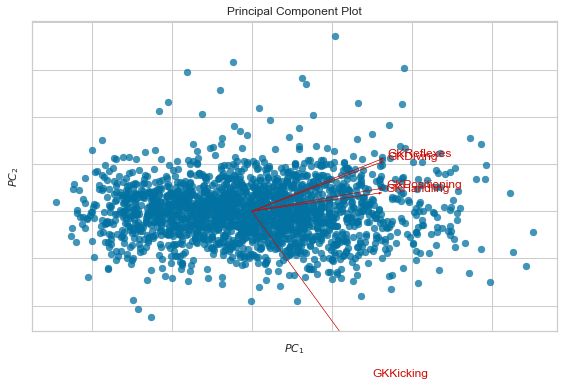

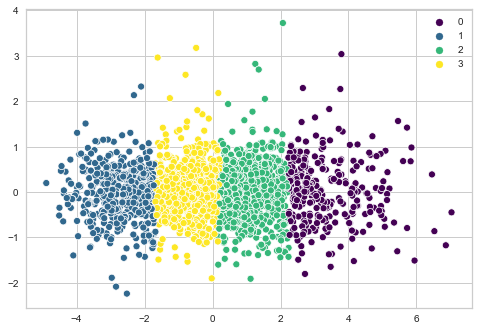

In [73]:
df_aux = create_df_resume(df_gk,1.5)
labels = ger_pca_kluster(df_aux,4)

In [74]:
df_gk['labels'] = labels
df_input = df_gk.query('labels == 0')
save_df(df_input,'gk')

## ST

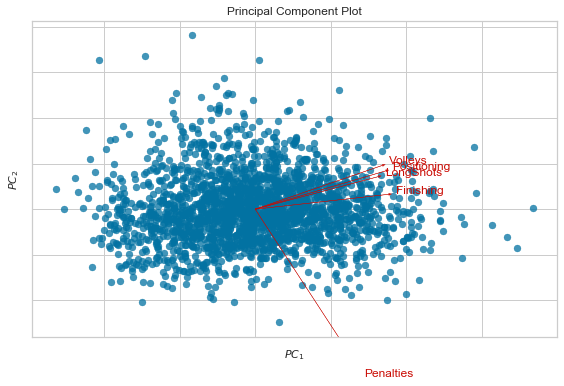

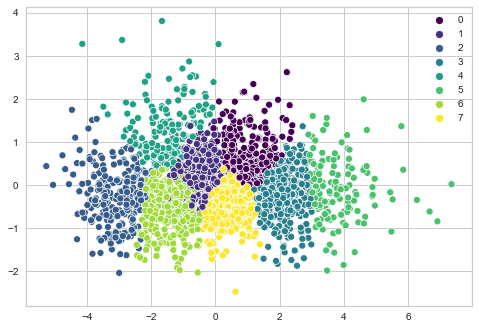

In [80]:
df_aux = create_df_resume(df_st,1.3)
labels = ger_pca_kluster(df_aux,8)

In [83]:
df_st['labels'] = labels
df_input = df_st.query('labels == 5')
save_df(df_input,'st')

## RM,CAM,CM

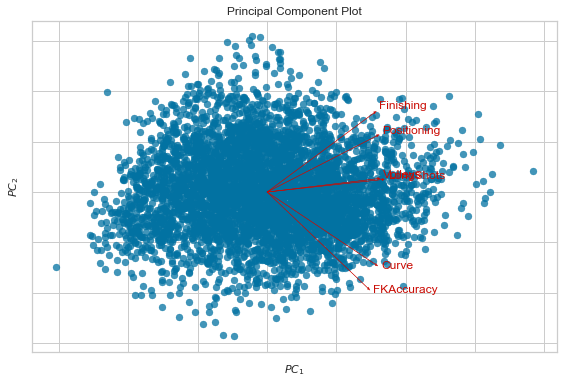

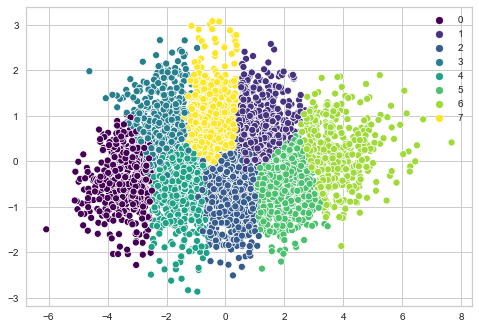

In [87]:
df_aux = create_df_resume(df_cam,1.35)
labels = ger_pca_kluster(df_aux,8)

In [89]:
df_cam['labels'] = labels
df_input = df_cam.query('labels == 6')
save_df(df_input,'cam')

## CB

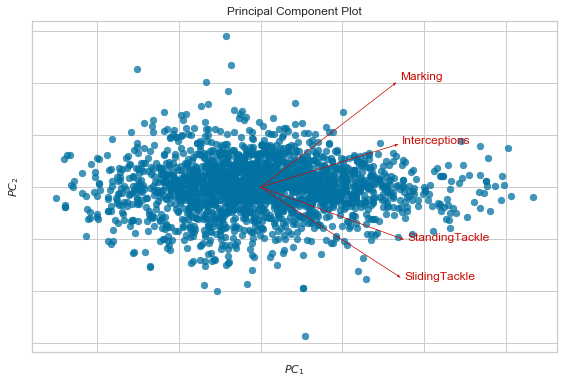

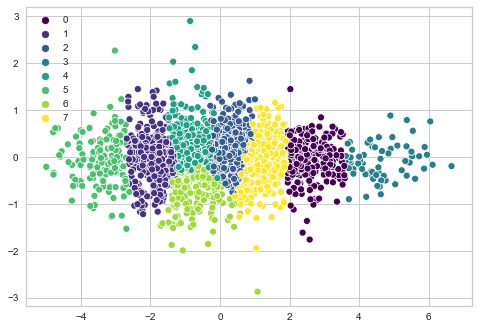

In [92]:
df_aux = create_df_resume(df_cb,1.4)
labels = ger_pca_kluster(df_aux,8)

In [95]:
df_cb['labels'] = labels
df_input = df_cb.query('labels == 3')
save_df(df_input,'cb')

## RB/LB

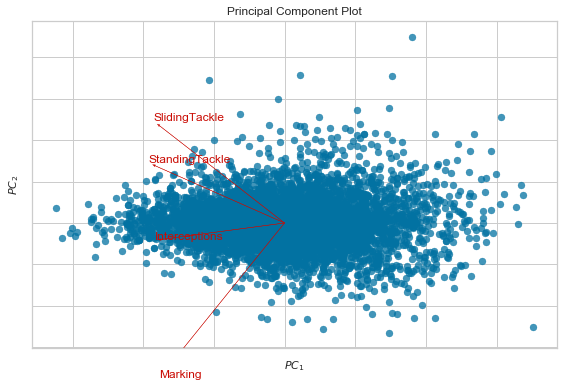

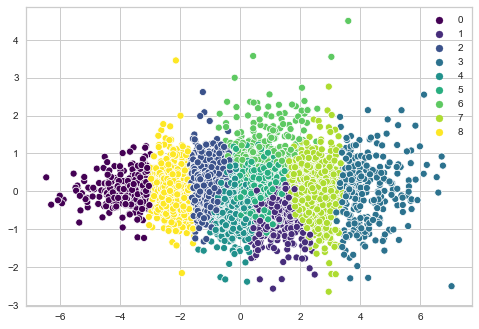

In [102]:
df_aux = create_df_resume(df_lat,1.4)
labels = ger_pca_kluster(df_aux,9)

In [104]:
df_lat['labels'] = labels
df_input = df_lat.query('labels == 0')
save_df(df_input,'lat')

## CDM/CM

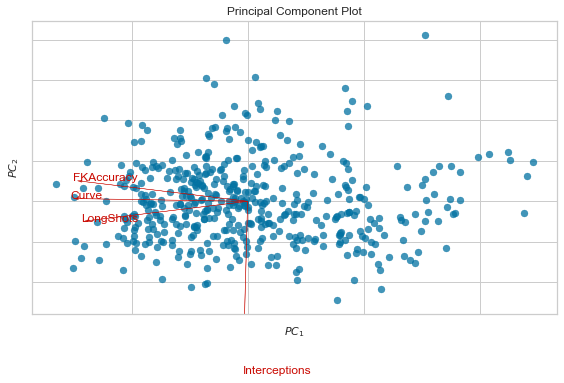

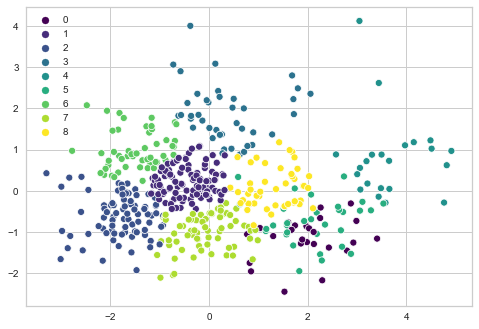

In [109]:
df_aux = create_df_resume(df_cm,1.4)
labels = ger_pca_kluster(df_aux,9)